<a href="https://colab.research.google.com/github/sherryHuan/CS4410/blob/main/Lab_5_%5BSOLUTIONS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab #5: K-Nearest Neighbors**
---

### **Description**
In this lab, you will implement KNN (K-Nearest Neighbors) models. KNNs are a popular machine learning algorithm used for classification and regression tasks. Through this lab, you'll gain hands-on experience in building and training KNN models, and using them to make accurate predictions. You'll get to see firsthand how KNN models work, and how they can be used to solve real-world problems.

<br>


### **Lab Structure**

**Part 1**: [Breast Cancer Dataset](#p1)

**Part 2**: [Spotify Dataset](#p2)

**Part 3**: [[HOMEWORK] Animals Dataset](#p3)

**Part 4**: [[HOMEWORK] Wine Quality Dataset](#p4)

**Part 5**: [[OPTIONAL] Australia Dataset](#p5)

</br>


###**Goals**
By the end of this lab, you will:
* Gain hands-on experience in building and training KNN models using the scikit-learn library.
* Make KNN models using sklearn and use these models to make predictions about new data.
* Apply KNN models for classification tasks.
* Evaluate the accuracy of KNN models using metrics such as confusion matrix.
* Apply KNN models to a real-world datasets.

</br>

### **Cheat Sheets**

* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1X-aC73lEWaYwzzG9AQJCJSyCFxLvGf2rFnK6hlE_Gy8/edit?usp=sharing)

* [EDA with pandas](https://docs.google.com/document/d/1hMsWa7ziMulT0WjoCaqLTkpoqilCO12HlOrVy4-_zwY/edit?usp=drive_link)

* [Data Visualizations with matplotlib](https://docs.google.com/document/d/1IA-sgjUvrQYyKlcBxFN-PIsHMEMrixwd6sh9RlMkubQ/edit?usp=drive_link)


<br>

**Run the cell below to import all necessary libraries and functions.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn import datasets, model_selection, metrics

<a name="p1"></a>

---
## **Part 1: Breast Cancer Dataset [Practice Together]**
---

#### **About the Dataset**
Breast cancer is one of the most common types of cancer in women. Each year in the United States, about 264,000 women are diagnosed with breast cancer. The abilty to detect it early is extremely important. The following dataset is taken from the [UCI ML Breast Cancer Wisconsin (Diagnostic) dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)). The dataset contains mammography exam results and whether or not cancer was detected.

The features are as follows:
* `radius`
* `texture`: standard deviation of gray-scale values
* `perimeter`
* `area`
* `smoothness`: local variations in radius lengths
* `compactness`: perimeter^2 / area - 1
* `concavity`: severity of concave portions of the contour
* `concave points`: number of concave portions of the contour
* `symmetry`
* `fractal dimension`: "coastline approximation" - 1

Note: There is data recorded for the mean, standard error, and worst (or largest) for each feature, resulting in 30 total features.
<br>

#### **Your Task**
Using the Breast Cancer dataset, we will do the following:
* Create a KNN classifier model that can be used to predict whether or not a patient has breast cancer;
* Use the model to predict whether or not patient have breast cancer based on various mean radii and mean textures



### **Step #1: Load the data**

Use the following code to load the breast cancer dataset.


In [ ]:
cancer_dataset = datasets.load_breast_cancer()
df = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
df['TARGET'] = cancer_dataset.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TARGET
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### **Step #2: Decide independent and dependent variables**

Complete the cell below to select our features and label. In particular, we will fit our classifier using the `"mean radius"` and `"mean texture"` features in order to predict whether the patient has breast cancer.

In [ ]:
features = df[# COMPLETE THIS LINE
label = df[# COMPLETE THIS LINE

#### **Solution**

In [ ]:
features = df[["mean radius","mean texture"]]
label = df['TARGET']

### **Before we continue our steps, let's visualize our data.**

Since we are building a classifier, it can be useful to look at some of the variables. Below we will look at `"mean radius"` and  `"mean texture"` and see if there appears to be a correlation with the detection of cancer.

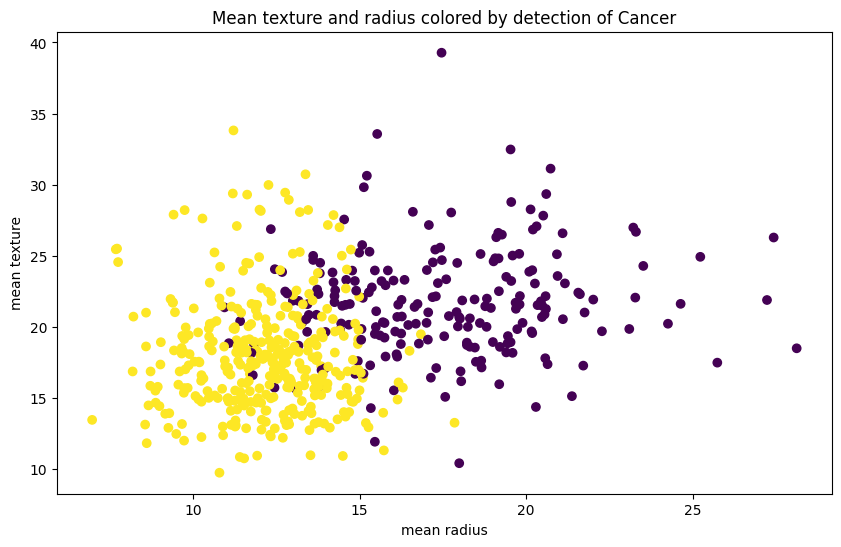

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(features['mean radius'], features['mean texture'], c=label)
plt.title("Mean texture and radius colored by detection of Cancer")
plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()
#yellow: breast cancer detected, purple: not detected

### **Step #3: Split data into training and testing data**

In [ ]:
X_train, X_test, y_train, y_test = # COMPLETE THIS LINE

#### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

### **Step #4: Import the KNN algorithm**

**Run the code below to complete this step.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### **Step #5: Initialize the model and set hyperparameters**


Let's set the *hyperparameter* `n_neighbors = 4`.

In [ ]:
model = # COMPLETE THIS LINE

#### **Solution**

In [ ]:
model = KNeighborsClassifier(n_neighbors = 4)

### **Step #6: Fit your model and make predictions on the test set. Create a visualization if applicable.**

#### **Solution**

In [ ]:
# fit
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# predict
pred = model.predict(X_test)

### **Create a visualization**

**Run the code below to visualize the decision boundary of this KNN model.**


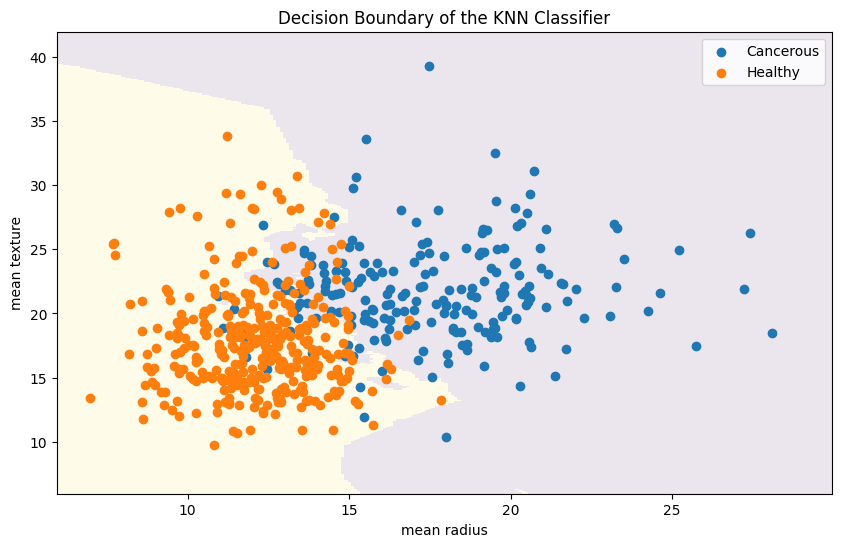

In [ ]:
# Make the same scatter plot of the training data

fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(6, 30, 0.1),
                     np.arange(6, 42, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in df.groupby('TARGET'):
  ax.scatter(data["mean radius"], data["mean texture"], label=["Cancerous","Healthy"][label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.legend()
plt.show()

### **Step #7: Evaluate your model**

Print the accuracy and confusion matrix for your model's performance on the test set.

In [ ]:
print("Accuracy Score: " + # COMPLETE THIS LINE

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(model, # COMPLETE THIS LINE

#### **Solution**

In [ ]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))

Accuracy Score:  0.9035087719298246


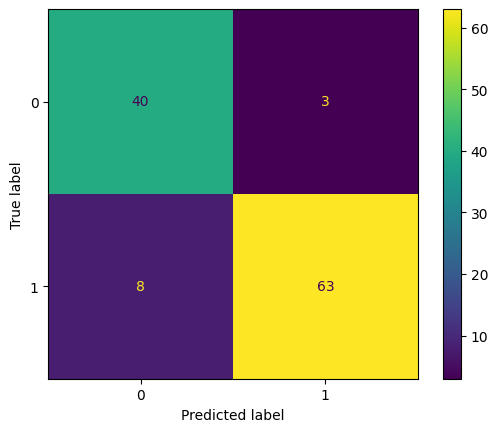

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### **Step #8: Use the model**

Predict whether the following patients have cancer or not:

1. Is a patient with mean radius `15.5` and mean texture `31.2` likely to have cancer?
2. Is a patient with mean radius `12.2` and mean texture `34.5` likely to have cancer?



In [ ]:
patient1 = pd.DataFrame([[15.5, 31.2]], columns=["mean radius", "mean texture"])

prediction1 = model.# COMPLETE THIS LINE

print("Patient 1 " + str(['is likely', 'is not likely'][prediction1]) + " to have cancer")

   mean radius  mean texture
0         15.5          31.2


In [ ]:
patient2 = pd.DataFrame(# COMPLETE THIS LINE

prediction2 = model.# COMPLETE THIS LINE

print("Patient 2 " + str(['is likely', 'is not likely'][prediction2]) + " to have cancer")

#### **Solution**

In [ ]:
patient1 = pd.DataFrame([[15.5, 31.2]], columns=["mean radius", "mean texture"])
prediction1 = model.predict(patient1)[0]
print("Patient 1 " + str(['is likely', 'is not likely'][prediction1]) + " to have cancer")

patient2 = pd.DataFrame([[12.2, 34.5]], columns=["mean radius", "mean texture"])
prediction2 = model.predict(patient2)[0]
print("Patient 2 " + str(['is likely', 'is not likely'][prediction2]) + " to have cancer")

# A patient with a mean radius of 15.5 and a mean texture of 31.2 is likely to have breast cancer
# A patient with a mean radius of 12.2 and a mean texture of 34.5 is not likely to have breast cancer

Patient 1 is likely to have cancer
Patient 2 is not likely to have cancer


### **[Optional]: Hyperparameter Tuning**

Run the given code below to find the optimal k for our model. What is this k?

{1: 92.98245614035088, 3: 92.98245614035088, 5: 95.6140350877193, 7: 95.6140350877193, 9: 95.6140350877193, 11: 98.24561403508771, 13: 97.36842105263158, 15: 96.49122807017544, 17: 96.49122807017544, 19: 96.49122807017544, 21: 96.49122807017544, 23: 95.6140350877193, 25: 94.73684210526315, 27: 94.73684210526315, 29: 94.73684210526315, 31: 94.73684210526315, 33: 94.73684210526315, 35: 94.73684210526315, 37: 94.73684210526315, 39: 94.73684210526315, 41: 94.73684210526315, 43: 94.73684210526315, 45: 94.73684210526315, 47: 94.73684210526315, 49: 94.73684210526315}


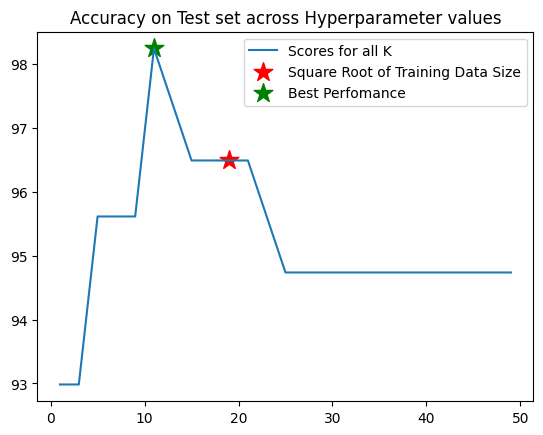

Top score of optimal classifier: 98.24561403508771
Best Value of N to use 11


In [ ]:
# Now lets see how accurate it is looking at all 30 variables

# Load all columns of the dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop(columns='TARGET'), df[['TARGET']],
                                      test_size=0.2, random_state=42)

# Hyperparameter tuning
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))

### **Reflection question**
Answer the following question: In the case of predicting breast cancer, do you think it's more important to reduce false positives or false negatives?

#### **Solution**

It is more important to reduce false negatives because the person would not have breast cancer. A false positive could lead to delayed treatment and a worse outcome.

<a name="p2"></a>

---
## **Part 2: Spotify Dataset**
---
#### **About the Dataset**
Spotify is one of the most popular digital music streaming services with over 515 million monthly users. The following dataset from Spotify data looks at different qualities of songs like energy, key, loudness, and tempo to see if a song is a top or bottom hit.

The features are as follows:
* `artist`: song artist(s)
* `song`: song title
* `duration_ms`: the track length in milliseconds (ms)
* `year`: the year the song was released
* `top half`: whether or not the song is in the top half of hits
* `danceability`: how suitable a track is for dancing (0.0: least danceable, 1.0: most danceable)
* `energy`: perceptual measure of intensity and activity (0.0 - 1.0)
* `key`: the key the track is in; integers map to pitches using standard Pitch Class notation (0: C, 1: C♯/D♭, 2:D, ..., 11: B)
* `loudness`: the overall loudness of a track in decibels (dB)
* `mode`: the modality of a track, or the type of scale from which its melodic content is derived (0: minor, 1: major)
* `speechiness`: a measure of the presence of spoken words in the track (0-0.33: music and other non-speech-like tracks, 0.33-0.66: contain both music and speech, 0.66-1.0: most likely made entirely of spoken words (e.g. talk show, audio book, poetry))
* `acousticness`: a confidence measure of whether or not the track is acoustic (0.0: low confidence, 1.0: high confidence)
* `instrumentalness`: predicts whether or not a track contains vocals (0.0: vocal content, 1.0: no vocal content)
* `liveness`: detects the presence of an audience in the recording ( > 0.8: strong likelihood the track was performed live)
* `valence`: musical positiveness conveyed by the track (lower valence: more negative, higher valence: more positive)
* `tempo`: the overall estimated tempo in beats per minute (BPM)
* `genre`: the genre in which the track belongs
* `explicit`: whether or not the song is explicit
* `explicity binary`: whether or not the song is explicit (0: no, 1: yes)

<br>

#### **Your Task**
Using the Spotify dataset, you will do the following:
* Create a KNN model that can predict whether a song will be a hit or a bust;
* Predict whether songs with various keys and energies will be hits or busts.

### **Step #1: Load the data**

Use the following code to load the dataset.

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQJ9UIsI2j8vPnefdBj6GIrUGiDMsF5HRVAg4rsfaZqX5fAoTGLGydLvPXPQvE5ZSo9_aet1SC5UQji/pub?gid=1132556054&single=true&output=csv"
spotify_df = pd.read_csv(url)

spotify_df.head()

,artist,song,duration_ms,year,top half,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,explicit,explicity binary
0,Britney Spears,Oops!...I Did It Again,211160,2000,1,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,False,0
1,blink-182,All The Small Things,167066,1999,1,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",False,0
2,Faith Hill,Breathe,250546,1999,1,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",False,0
3,Bon Jovi,It's My Life,224493,2000,1,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",False,0
4,*NSYNC,Bye Bye Bye,200560,2000,1,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,False,0


### **Step #2: Decide independent and dependent variables**

For this problem, we are interested in how the `key` and `energy` affect whether or not a song becomes a hit.

In [ ]:
features = spotify_df[# COMPLETE THIS LINE
label = spotify_df[# COMPLETE THIS LINE

plt.figure(figsize=(10,6))
plt.scatter(# COMPLETE THIS LINE

# yellow: top hit, purple: bottom hit
plt.title("Energy vs. Key of Hit Songs Colored by Whether they were a Top or Bottom Hit")
plt.xlabel("Key")
plt.ylabel("Energy")

plt.show()

#### **Solution**

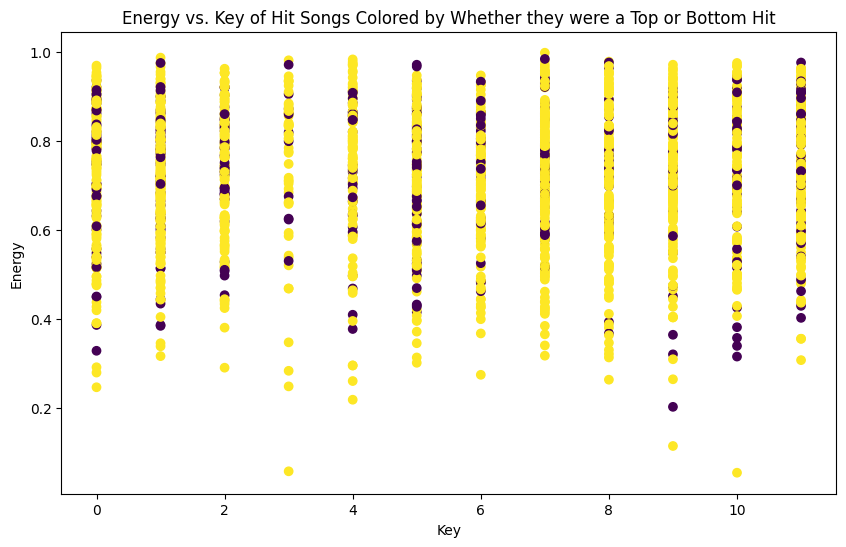

In [ ]:
features = spotify_df[['key', 'energy']]
label = spotify_df["top half"]

plt.figure(figsize=(10,6))
plt.scatter(features['key'], features['energy'], c = label)

# yellow: top hit, purple: bottom hit
plt.title("Energy vs. Key of Hit Songs Colored by Whether they were a Top or Bottom Hit")
plt.xlabel("Key")
plt.ylabel("Energy")

plt.show()

### **Step #3: Split data into training and testing data**

Split the data as described above.

#### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

### **Step #4: Import the KNN algorithm**

#### **Solution**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### **Step #5: Initialize the model and set hyperparameters**

Let's set the *hyperparameter* `n_neighbors = 9`.

#### **Solution**

In [ ]:
model = KNeighborsClassifier(n_neighbors = 9)

### **Step #6: Fit your model and make a prediction. Create a visualization if applicable.**

#### **Solution**


In [ ]:
# fit
model.fit(X_train, y_train)

# predict
pred = model.predict(X_test)

### **Create a visualization**

**Run the code below to visualize the decision boundary of this KNN model.**


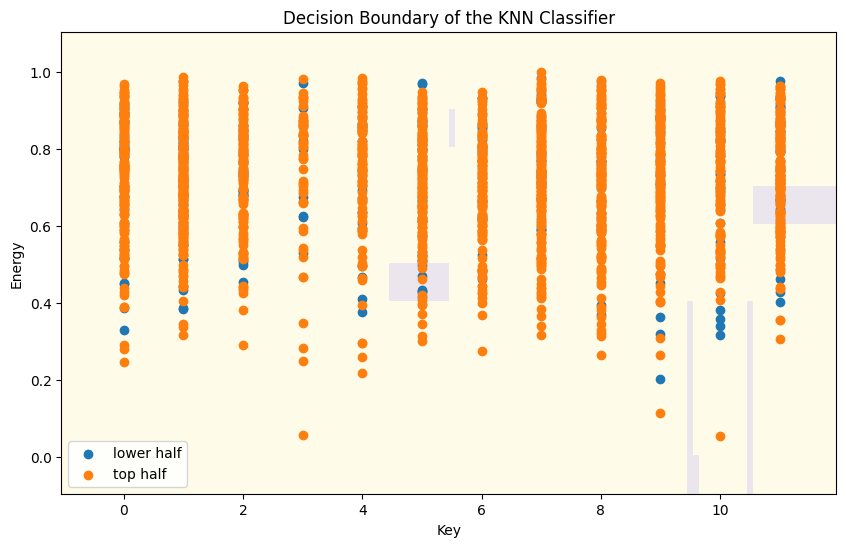

In [ ]:
# Make the same scatter plot of the training data

fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(spotify_df['key'].min() - 1, spotify_df['key'].max() + 1, 0.1),
                     np.arange(spotify_df['energy'].min() - 0.1, spotify_df['energy'].max() + 0.1, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in spotify_df.groupby('top half'):
  ax.scatter(data["key"], data["energy"], label=['lower half', 'top half'][label])

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("Key")
ax.set_ylabel("Energy")
ax.legend()
plt.show()

### **Step #7: Evaluate your model**

Print the accuracy and confusion matrix for your model's performance on the test set.

In [ ]:
print("Accuracy Score: " + # COMPLETE THIS LINE

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(model, # COMPLETE THIS LINE

#### **Solution**

In [ ]:
print("Accuracy Score: ", metrics.accuracy_score(y_test, pred))

Accuracy Score:  0.7925


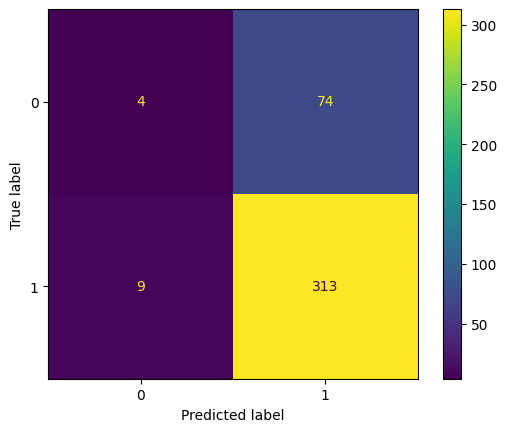

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### **Step #8: Use the model**

Use your model to predict whether the following songs are in the top hits.

1. We are given an song with `key = 3` and `energy = 0.8`. According to your KNN model, will this song be in the top half of hits?
2. We are given another song with `key = 4.5` and `energy = 0.45`. Will this song be a bust or a hit?
3. We are given an song with `key = 1` and `energy = 0.5`. Will this song be a bust or a hit?

#### **Solution**

In [ ]:
# 1 yes; a song with a key of 3 and an energy of 0.8 will be in the top half of hits
song = pd.DataFrame([[3, 0.8]], columns = ["key", "energy"])
prediction = model.predict(song)
print(prediction)

# 2 no; a song with a key of 4.5 and an energy of 0.45 will be a bust
song = pd.DataFrame([[4.5, 0.45]], columns = ["key", "energy"])
prediction = model.predict(song)
print(prediction)

# 3 yes; a song with a key of 1 and an energy of 0.5 will be a hit
song = pd.DataFrame([[1, 0.5]], columns = ["key", "energy"])

prediction = model.predict(song)

print(prediction)

[1]
[0]
[1]


### **[Optional]: Hyperparameter Tuning**

Run the given code below to find the optimal k for our model. What is this k?

{1: 69.5, 3: 71.75, 5: 75.0, 7: 77.25, 9: 79.25, 11: 80.25, 13: 80.25, 15: 80.5, 17: 80.5, 19: 80.5, 21: 80.5, 23: 80.5, 25: 80.5, 27: 80.5, 29: 80.5, 31: 80.5, 33: 80.5, 35: 80.5, 37: 80.5, 39: 80.5, 41: 80.5, 43: 80.5, 45: 80.5, 47: 80.5, 49: 80.5}


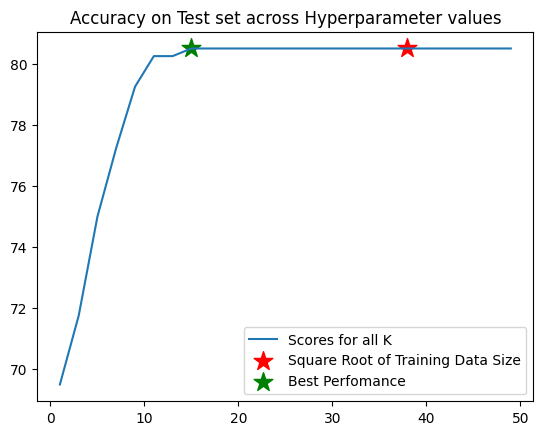

Top score of optimal classifier: 80.5
Best Value of N to use 11


In [ ]:
# Hyperparameter tuning
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))

### **Reflection question**
Answer the following question: Do you think using only the two features `energy` and `key` is enough to predict whether or not a song will be a top hit?

#### **Solution**

No, because there are additional factors (such as duration, loudness, and explicitness) that similarly contribute to whether or not a song is a top hit.

<a name="p3"></a>

---
## **Part 3: [HOMEWORK] Zoo Animal Classification Dataset**
---

#### **About the Dataset**
The following dataset contains information on various zoo animals, including their characteristics and classifications. Our goal is to build a model that predicts the classification of an animal based on its features.

The features are as follows (all features marked with an * is 1 if yes and 0 if no):


*    `animal_name`: Name of the animal
*   `hair`: Hair presence*
- `feathers`: Feather presence*
-     `eggs`: Egg-laying ability*
-    ` milk`: Milk production ability*
-     `airborne`: Ability to fly*
-     `aquatic`: Ability to live in water*
- `predator`: Predatory behavior*
- `toothed`: Teeth presence*
- `backbone`: Backbone presence*
-  `breathes`: Ability to breathe*
- `venomous`: Venom presence*
- `fins`: Fin presence*
- `legs`: Number of legs (0, 2, 4, 5, 6, or 8)
- `tail`: Tail presence*
- `domestic`: Domestication status*
- `catsize`: Cat-like size*
- `class_type`: Numeric class identifier (1-7)


<br>

#### **Your Task**
* Build a model that can predict what class an animal belongs to.

### **Step #1: Load the data**

Use the following code to load the zoo animal classification dataset.

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"

# Create dataframe
column_names = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type']
animals_df = pd.read_csv(url, names=column_names)
animals_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### **Step #2: Decide independent and dependent variables**

We are going to use all features except `animal_name` and `class_type` as our independent variables for predicting `class_type`.



#### **Solution**

In [ ]:
features = animals_df.drop(['animal_name', 'class_type'], axis=1)
label = animals_df['class_type']

### **Step #3: Split data into training and testing data**

#### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

### **Step #4: Import the KNN algorithm**

#### **Solution**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### **Step #5: Initialize your model and set hyperparameters**

Initialize the KNN model, and set hyperparameter `n_neighbors = 3`.

#### **Solution**

In [ ]:
model = KNeighborsClassifier(n_neighbors = 3)

### **Step #6: Fit your model, test on the testing data**

**NOTE**: Visualization would be quite tricky here since there are 16 features instead of just 2. So, do not worry about doing this here.

#### **Solution**

In [ ]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

### **Step #7: Evaluate your model**

Print the accuracy and confusion matrix for your model's performance on the test set.

In [ ]:
print("Accuracy Score: " + # COMPLETE THIS LINE

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(model, # COMPLETE THIS LINE

#### **Solution**

In [ ]:
print("Accuracy Score: " + str(metrics.accuracy_score(y_test, pred)))

Accuracy Score: 0.9523809523809523


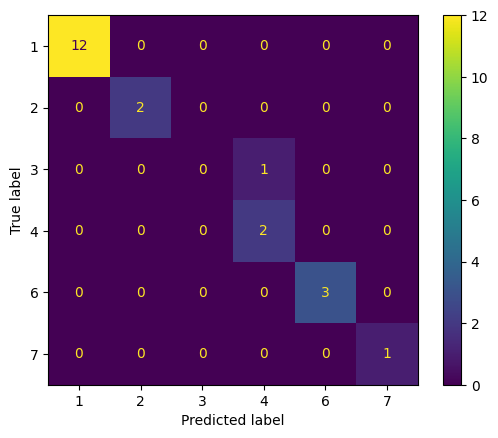

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### **Reflection question**
Answer the following question:

1. How accurately was your algorithm able to predict the type of species?

2. What is the optimal value of K between 1 - 50 based on accuracy?

#### **Solution**

1. The algorithm was able to predict the type of species very well, as the algorithm had an accuracy of 95.24%.

2. K = 1. This is likely overfitting a bit and producing overly optimistic results. However, these accuracies are reported based on the test data, which is all we have to go off here. Notice that we still get good results for K = 3 and 5, so it may be worth sacrificing a little accuracy here so that our model is more likely able to generalize to data it's never seen before.

{1: 100.0, 3: 95.23809523809523, 5: 90.47619047619048, 7: 85.71428571428571, 9: 85.71428571428571, 11: 85.71428571428571, 13: 85.71428571428571, 15: 80.95238095238095, 17: 80.95238095238095, 19: 71.42857142857143, 21: 71.42857142857143, 23: 71.42857142857143, 25: 71.42857142857143, 27: 71.42857142857143, 29: 71.42857142857143, 31: 61.904761904761905, 33: 61.904761904761905, 35: 61.904761904761905, 37: 61.904761904761905, 39: 61.904761904761905, 41: 61.904761904761905, 43: 61.904761904761905, 45: 61.904761904761905, 47: 61.904761904761905, 49: 61.904761904761905}


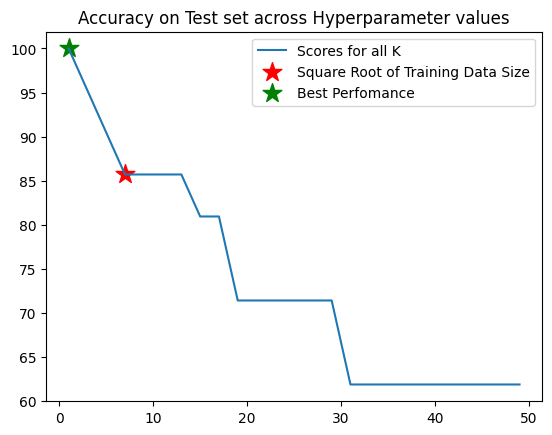

Top score of optimal classifier: 100.0
Best Value of N to use 1


In [ ]:
# Hyperparameter tuning
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test.values)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))

<a name="p4"></a>

---
## **Part 4: [HOMEWORK] Wine Dataset**
---

#### **About the Dataset**
We've already explored this dataset; now it's time to create a KNN model using it! The following dataset is taken from the [UCI ML Wine Recognition](https://archive.ics.uci.edu/ml/datasets/wine) dataset and contains the results of a chemical analysis of wines grown in the same region in Italy by three different cultivars (grape types).

The features are as follows:
* `alcohol`
* `malic_acid`
* `ash`
* `alcalinity_of_ash`
* `magnesium`
* `total_phenols`
* `flavanoids`
* `nonflavanoid_phenols`
* `proanthocyanins`
* `color_intensity`
* `hue`
* `od280/od315_of_diluted_wines`
* `proline`
* `TARGET`: which cultivar the wine originated from

<br>

#### **Your Task**
* Build a model that can predict which cultivar (grape type) the wine originated from.
* Predict the which cultivar a wine originated from given its malic acid and color intensity


### **Step #1: Load the data**

Use the following code to load the wine dataset.

In [ ]:
wine_dataset = datasets.load_wine()
df = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)
# create a new column TARGET
df['TARGET'] = wine_dataset.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,TARGET
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### **Step #2: Decide independent and dependent variables**

Use `malic_acid` and `color_intensity` as features and `TARGET` as the label.

In [ ]:
features = # COMPLETE THIS LINE
label = # COMPLETE THIS LINE

#### **Solution**

In [ ]:
features = df[["malic_acid","color_intensity"]]
label = df["TARGET"]

### **Visualize our data before creating our model**


Graph a scatter plot of the features on the x and y axes.Be sure to set the `c` value to the target to color the dots by target class.
```
plt.scatter(x, y, c=df["TARGET"]
```

#### **Solution**

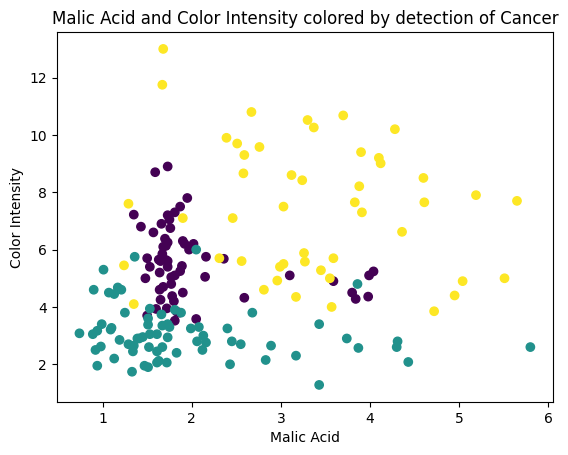

In [ ]:
plt.scatter(features["malic_acid"], features["color_intensity"], c=label)
plt.title("Malic Acid and Color Intensity colored by detection of Cancer")
plt.xlabel("Malic Acid")
plt.ylabel("Color Intensity")
plt.show()
# color to target: yellow: 2, teal: 1, purple: 0

#label =[0,1,2,0,0,0,1,2....0]

### **Steps #3-6: Split data, import the algorithm, initialize the model, fit the model, and make a prediction with the testing data**


Set the *hyperparameter* `n_neighbors = 3`. You can skip creating a visualization for now, but if you have time you can go back and try to create one.



#### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# initialize
model = KNeighborsClassifier(n_neighbors = 3)

# fit
model.fit(X_train, y_train.values.ravel())

# predict
pred = model.predict(X_test)

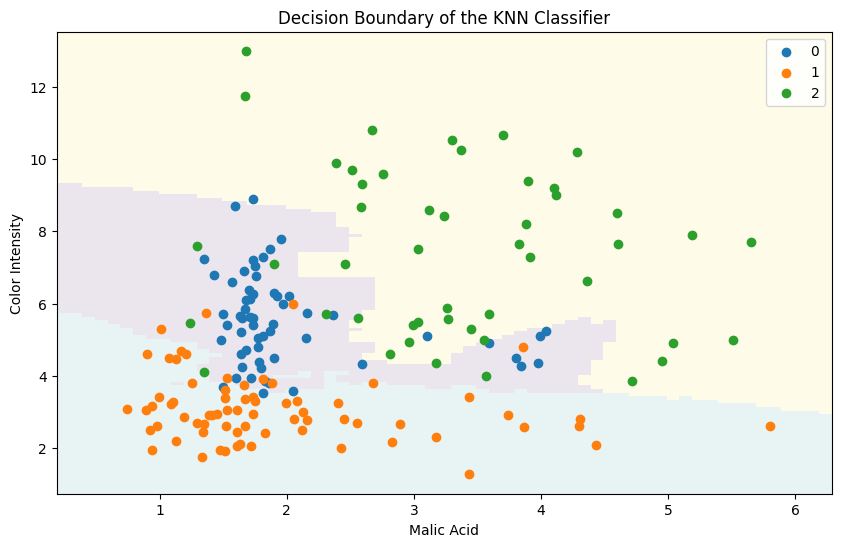

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(df["malic_acid"].min() - 0.5, df["malic_acid"].max() + 0.5, 0.1),
                     np.arange(df["color_intensity"].min() - 0.5, df["color_intensity"].max() + 0.5, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in df.groupby('TARGET'):
  ax.scatter(data["malic_acid"], data["color_intensity"], label=label)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("Malic Acid")
ax.set_ylabel("Color Intensity")
ax.legend()
plt.show()

### **Step #7: Evaluate your model**

Display the `accuracy_score` and `ConfusionMatrixDisplay.from_estimator`.

#### **Solution**

In [ ]:
print("Accuracy Score: " + str(metrics.accuracy_score(y_test, pred)))

Accuracy Score:  0.8611111111111112


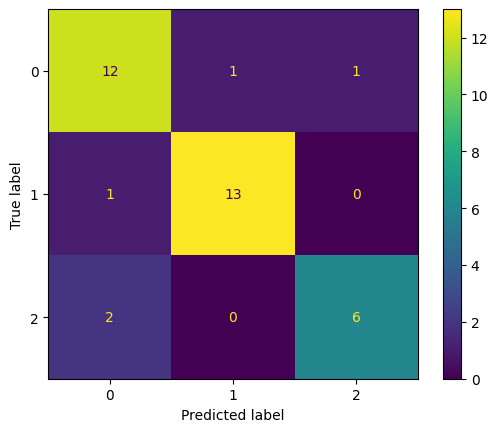

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### **Step #8: Use the model**


Who is likely to have cultivated a wine with `malic_acid = 4.1` and `color_intensity = 1.1` ?


#### **Solution**

In [ ]:
unknown_wine = pd.DataFrame([[4.1, 1.1]], columns=["malic_acid", "color_intensity"])
prediction = model.predict(unknown_wine)[0]
print("Wine is likely from " + str(['cultivator 1', 'cultivator 2', 'cultivator 3'][prediction]))

# A wine with a malic acid of 4.1 and a color intensity of 1.1 is likely to be from cultivator 2

Wine is likely from cultivator 2


### **Reflection question**
Answer the following questions:

1. How accurate is your model? Can you think of a way to improve the accuracy?

2. From 1 - 100, what is the best value of K according to accuracy?

#### **Solution**

1. The model is 86.1% accurate, which is a good accuracy score. The accuracy could be improved through hyperparameter tuning.

2. K = 1. This is likely overfitting a bit and producing overly optimistic results. However, these accuracies are reported based on the test data, which is all we have to go off here. Notice that we still get good results for K = 3 and 5, so it may be worth sacrificing a little accuracy here so that our model is more likely able to generalize to data it's never seen before.

{1: 88.88888888888889, 3: 86.11111111111111, 5: 83.33333333333334, 7: 75.0, 9: 75.0, 11: 72.22222222222221, 13: 69.44444444444444, 15: 69.44444444444444, 17: 72.22222222222221, 19: 69.44444444444444, 21: 72.22222222222221, 23: 75.0, 25: 72.22222222222221, 27: 72.22222222222221, 29: 72.22222222222221, 31: 72.22222222222221, 33: 75.0, 35: 75.0, 37: 75.0, 39: 77.77777777777779, 41: 75.0, 43: 75.0, 45: 75.0, 47: 77.77777777777779, 49: 77.77777777777779, 51: 77.77777777777779, 53: 77.77777777777779, 55: 77.77777777777779, 57: 77.77777777777779, 59: 75.0, 61: 75.0, 63: 75.0, 65: 77.77777777777779, 67: 77.77777777777779, 69: 75.0, 71: 69.44444444444444, 73: 72.22222222222221, 75: 66.66666666666666, 77: 72.22222222222221, 79: 69.44444444444444, 81: 69.44444444444444, 83: 69.44444444444444, 85: 69.44444444444444, 87: 69.44444444444444, 89: 66.66666666666666, 91: 66.66666666666666, 93: 66.66666666666666, 95: 66.66666666666666, 97: 66.66666666666666, 99: 66.66666666666666}


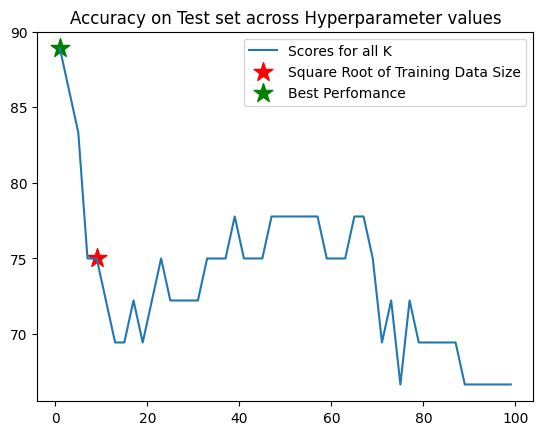

Top score of optimal classifier: 88.88888888888889
Best Value of N to use 1


In [ ]:
# Hyperparameter tuning
scores = {}
for n in range(1,100,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))

<a name="p5"></a>

---
## **Part 5: [OPTIONAL] Australia Dataset**
---
#### **About the Dataset**
Weather, and humans' ability to forecast/predict it plays a large role in many aspects of daily life. This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

The features are as follows:
* `Location`: the location of the weather station
* `WindSpeed`: the wind speed averaged over 10 minutes prior to 9am (in km/hr)
* `Humidity`: the humidity (percent) at 9am
* `Pressure`: atmospheric pressure reduced to mean sea level at 9am (in hundreds of hPa)
* `Temp`: temperature at 9am (in Celsius)
* `RainToday`: whether or not the rain/precipitation in the 24 hours to 9am exceeds 1mm (0: no, 1: yes)
* `RainTomorrow`: whether or not it rained at least 1mm the next day (0: no, 1: yes)

<br>

#### **Your Task**
* Build a model that can predict whether or not it will rain tomorrow.
* Build another model with the optimal hyperparameters and compare the accuracies.


<br>

**Run the code below before continuing.**

In [ ]:
url = "https://raw.githubusercontent.com/the-codingschool/TRAIN/main/australia/australia_weather.csv"
australia_df = pd.read_csv(url)
australia_df.head(10)

,Location,WindSpeed,Humidity,Pressure,Temp,RainToday,RainTomorrow
0,Albury,20,71,10.077,16.9,0,0
1,Albury,4,44,10.106,17.2,0,0
2,Albury,7,82,10.108,17.8,0,0
3,Albury,19,55,10.092,20.6,0,0
4,Albury,6,48,10.134,16.3,0,0
5,Albury,15,58,10.070,20.1,1,0
6,Albury,17,48,10.118,20.4,0,1
7,Albury,15,89,10.105,15.9,1,1
8,Albury,24,65,10.012,15.8,1,0
9,Albury,11,69,10.122,17.2,0,1


### **Problem 5.1**

Create a KNN model with the hyperparameter `n_neighbors = 3` in order to predict whether or not it will rain tomorrow. Use all features except `Location` and `RainTomorrow`, and then train and evaluate the model using `accuracy_score` and the confusion matrix.

In [ ]:
features = # COMPLETE THIS LINE
label = # COMPLETE THIS LINE

# COMPLETE THIS CODE

#### **Solution**

In [ ]:
features = australia_df.drop(['Location', 'RainTomorrow'], axis=1)
label = australia_df['RainTomorrow']

#split the train and test data
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size=0.2, random_state=42)

# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

# initialize
model = KNeighborsClassifier(n_neighbors = 3)

# fit
model.fit(X_train, y_train)

# predict
pred = model.predict(X_test)

# Evaluation of accuracy
print("Accuracy Score: " + str(metrics.accuracy_score(y_test, pred)))

Accuracy Score: 0.7573831355121786


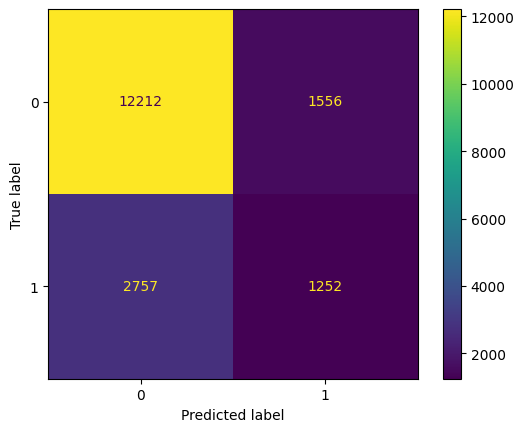

In [ ]:
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

### **Problem #5.2**

Using the same features and train/test split, determine the best value of K between 1 - 100.

**NOTE**: $\sqrt{\text{number training data points}} ≈ 265$). However, it will take the computer a long time to train that many models.

#### **Solution**


{1: 70.95685436237835, 3: 75.73831355121786, 5: 77.13899983124261, 7: 77.90965854756145, 9: 78.18529560668279, 11: 78.44405692749058, 13: 78.59593857231253, 15: 78.59031332620802, 17: 78.71406874050739, 19: 78.70281824829837, 21: 78.79844743207516, 23: 78.79844743207516, 25: 78.80407267817966, 27: 78.92220284637453, 29: 78.95032907689712, 31: 78.98408055352422, 33: 78.89970186195646, 35: 78.89970186195646, 37: 78.87157563143387, 39: 78.92782809247905, 41: 78.83782415480677, 43: 78.88282612364291, 45: 78.89407661585194, 47: 78.97283006131518, 49: 78.96157956910615, 51: 78.87720087753839, 53: 78.88845136974743, 55: 78.94470383079259, 57: 78.93907858468808, 59: 78.97283006131518, 61: 78.99533104573325, 63: 79.02908252236035, 65: 79.06283399898746, 67: 79.04033301456938, 69: 79.15283793665972, 71: 79.16408842886877, 73: 79.09096022951005, 75: 79.00658153794228, 77: 79.08533498340552, 79: 79.079709737301, 81: 79.09658547561456, 83: 79.08533498340552, 85: 79.09658547561456, 87: 79.0965854756

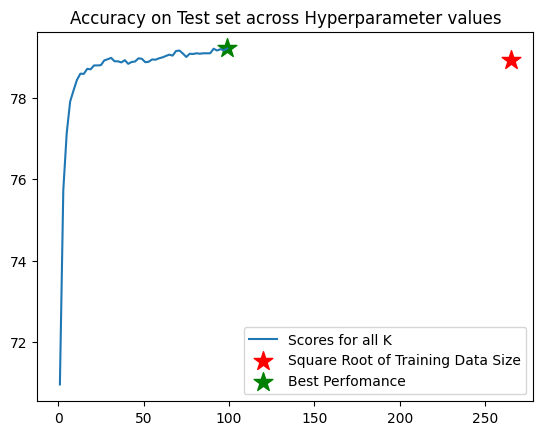

Top score of optimal classifier: 79.21471564380941
Best Value of N to use 99


In [ ]:
# Hyperparameter tuning
scores = {}
for n in range(1, 100, 2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))

{100: 79.22596613601846, 102: 79.15283793665972, 104: 79.13033695224166, 106: 79.14721269055521, 108: 79.09658547561456, 110: 79.10783596782359, 112: 79.1134612139281, 114: 79.02345727625584, 116: 78.97845530741971, 118: 79.00658153794228, 120: 79.01783203015131, 122: 79.079709737301, 124: 79.05720875288293, 126: 79.05720875288293, 128: 79.08533498340552, 130: 79.05720875288293, 132: 79.10221072171908, 134: 79.06845924509197, 136: 79.1134612139281, 138: 79.11908646003263, 140: 79.079709737301, 142: 79.1134612139281, 144: 79.11908646003263, 146: 79.11908646003263, 148: 79.06845924509197, 150: 79.03470776846487, 152: 79.01783203015131, 154: 78.98408055352422, 156: 78.98970579962872, 158: 78.96720481521066, 160: 78.98970579962872, 162: 78.98408055352422, 164: 78.97845530741971, 166: 78.95032907689712, 168: 78.96720481521066, 170: 79.00658153794228, 172: 78.97283006131518, 174: 78.95595432300163, 176: 78.93345333858356, 178: 78.93907858468808, 180: 78.95595432300163, 182: 78.95032907689712

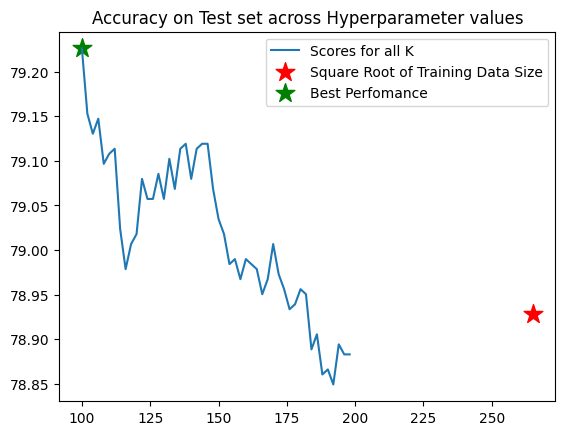

Top score of optimal classifier: 79.22596613601846
Best Value of N to use 100


In [ ]:
# Hyperparameter tuning
scores = {}
for n in range(100, 200, 2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))

{200: 78.87157563143387, 202: 78.86595038532936, 204: 78.82657366259774, 206: 78.87720087753839, 208: 78.87157563143387, 210: 78.9109523541655, 212: 78.92782809247905, 214: 78.91657760027002, 216: 78.90532710806097, 218: 78.91657760027002, 220: 78.92220284637453, 222: 78.89970186195646, 224: 78.93345333858356, 226: 78.89407661585194, 228: 78.90532710806097, 230: 78.89407661585194, 232: 78.87157563143387, 234: 78.88845136974743, 236: 78.87157563143387, 238: 78.89970186195646, 240: 78.92220284637453, 242: 78.9109523541655, 244: 78.89407661585194, 246: 78.88282612364291, 248: 78.87720087753839, 250: 78.9109523541655, 252: 78.92220284637453, 254: 78.89407661585194, 256: 78.9109523541655, 258: 78.9109523541655, 260: 78.90532710806097, 262: 78.90532710806097, 264: 78.92782809247905, 266: 78.93907858468808, 268: 78.9109523541655, 270: 78.92782809247905, 272: 78.95032907689712, 274: 78.92782809247905, 276: 78.93345333858356, 278: 78.89407661585194, 280: 78.92220284637453, 282: 78.9222028463745

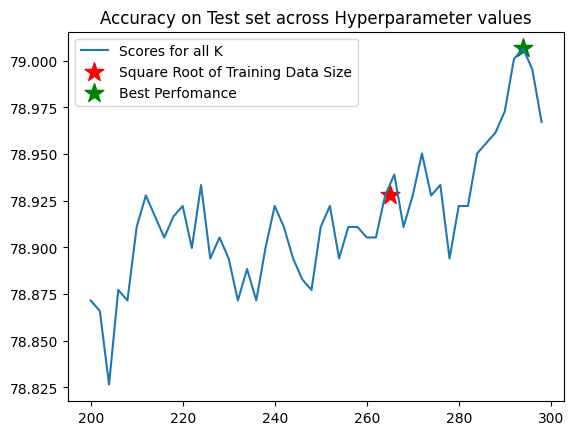

Top score of optimal classifier: 79.00658153794228
Best Value of N to use 294


In [ ]:
# Hyperparameter tuning
scores = {}
for n in range(200, 300, 2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')

# ADDING THE PERFORMANCE FOR K = SQRT SIZE FOR REFERENCE
k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))

### **Reflection questions**
Answer the following questions:

1. Do you think this model is useful?
2. Can you think of a real world application for this model?

#### **Solution**

1. Yes, because it can give a general idea of whether or not it is likely to rain, although it does not suggest how much rain.

2. Weather app, news station, farmers, airlines.

---

# End of Notebook

© 2023 The Coding School, All rights reserved